# Regression project, statistic plots

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import kagglehub

# Download latest version
path = kagglehub.dataset_download("sehriyarmemmedli/turboaz-cars-project")

print("Path to dataset files:", path)

df = pd.read_csv(path + '/cars.csv')

# looking for data size
print(f'shape: {df.shape}')

# dropping duplicates (makes up a significant amount of data)
df.drop_duplicates(subset=['car_rel_url_x'], keep='last', inplace=True)

# checking shape again
print(f'last shape: {df.shape}')




df['price'] = df[['currency_y', 'price_y']].apply(lambda row:  row['price_y']*1.7 if row['currency_y']=='USD' \
                                                  else row['price_y']*2 if row['currency_y']=='EUR' \
                                                  else row['price_y'], axis=1)



100%|██████████| 240M/240M [00:03<00:00, 67.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/sehriyarmemmedli/turboaz-cars-project/versions/1
shape: (653721, 56)
last shape: (154030, 56)


<Axes: ylabel='Frequency'>

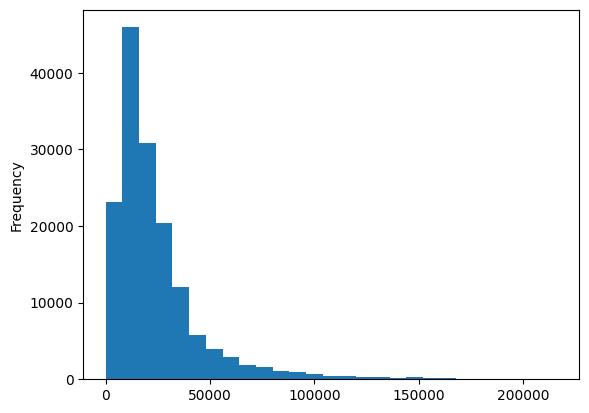

In [ ]:
df['price'].plot.hist(bins=[i for i in range(0, 220_000, 8_000)])

<Axes: ylabel='Density'>

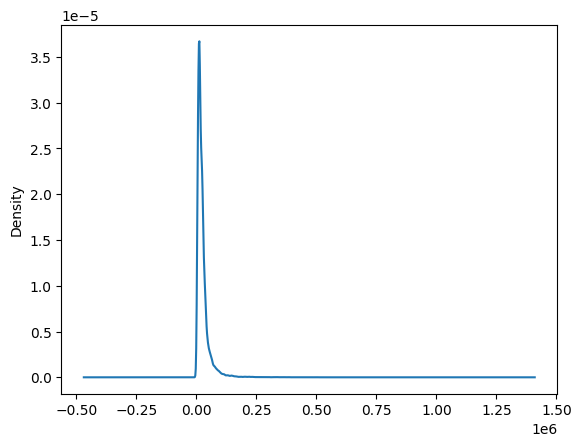

In [ ]:
df['price'].plot.kde()

In [ ]:
df['price'].mean()

25523.98026748036

In [ ]:
df['price'].median()

17900.0

In [ ]:
df.price.std()

30808.999831578265

In [ ]:
np.percentile(df.price, 25)

10800.0

In [ ]:
np.percentile(df.price.values, 50)

17900.0

In [ ]:
np.percentile(df.price.values, 75)

29500.0

In [ ]:
np.percentile(df.price.values, 5)

4500.0

In [ ]:
np.percentile(df.price.values, 95)

69699.23499999999

In [ ]:
np.percentile(df.price.values, 99)

144500.0

In [ ]:
np.percentile(df.price.values, 1)

2500.0

<Axes: ylabel='price'>

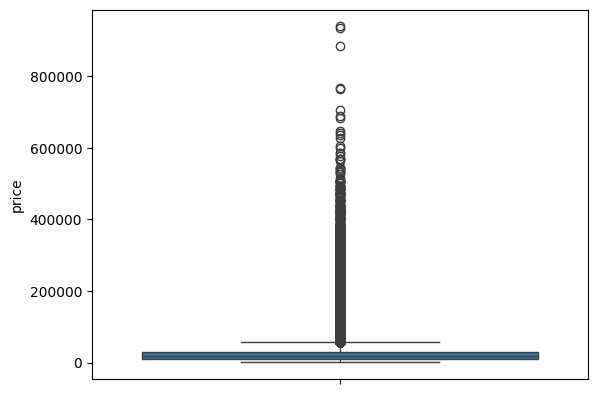

In [ ]:
sns.boxplot(y=df['price'])

<Axes: ylabel='price'>

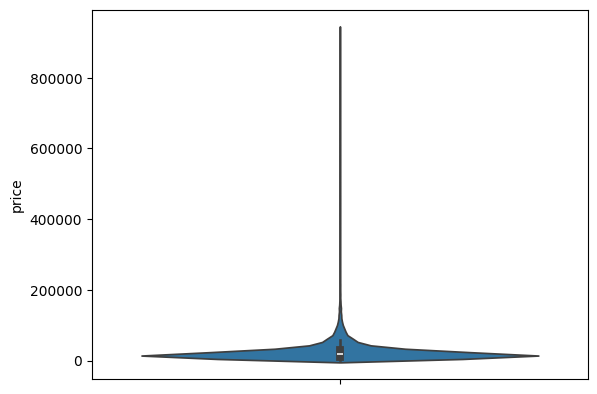

In [ ]:
sns.violinplot(y=df['price'])

In [ ]:
df['price'].skew()

6.740285900076204

In [ ]:
df['price'].kurtosis()

83.02184461528938

In [ ]:
from sklearn.ensemble import IsolationForest

isof = IsolationForest(random_state=42)

In [ ]:
df_price.loc[:, 'isoforest'] = isof.fit_predict(df_price)

print('isolation forest max : {}'.format(np.max(df_price[df_price['isoforest'] == 1]['price'].values)))
print('isolation forest min : {}'.format(np.min(df_price[df_price['isoforest'] == 1]['price'].values)))
print('isolation forest outliers max : {}'.format(np.max(df_price[df_price['isoforest'] == -1]['price'].values)))
print('isolation forest outliers min : {}'.format(np.min(df_price[df_price['isoforest'] == -1]['price'].values)))
print('isolation forest outliers count : {}'.format(np.sum(df_price['isoforest'] == -1)))

isolation forest max : 35550.0
isolation forest min : 3850.0
isolation forest outliers max : 940000.0
isolation forest outliers min : 500.0
isolation forest outliers count : 48240


In [ ]:
df['price'].shape

(154030,)

In [ ]:
df[['price']]

,price
4,10500.0
10,8000.0
16,5800.0
18,9500.0
20,21300.0
...,...
653716,10800.0
653717,9500.0
653718,25400.0
653719,10600.0


In [ ]:
# lets see IQR

Q1 = np.percentile(df['price'], 25)
Q3 = np.percentile(df['price'], 75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

df_price = df[['price']]

df_price_filtered_with_iqr = df_price[~((df_price['price'] < lower_bound) | (df_price['price'] > upper_bound))]


print(f'shape after filtering with IQR: {df_price_filtered_with_iqr.shape}')
print(f'max : {np.max(df_price_filtered_with_iqr)}')
print(f'min : {np.min(df_price_filtered_with_iqr)}')
print('lower bound value : {}'.format(lower_bound))
print('upper bound value : {}'.format(upper_bound))

print('\n'*3)


# 5%, 95% percentile
fifth = np.percentile(df_price['price'], 5)
ninety_fifth = np.percentile(df_price['price'], 95)

between_fifth_and_ninety_fifth = df_price[~((df_price['price'] < fifth) | (df_price['price'] > ninety_fifth))]['price']

print(f'fifth : {fifth}')
print(f'ninety_fifth : {ninety_fifth}')
print('Count between 5% and 95% : {}'.format(between_fifth_and_ninety_fifth.shape[0]))

print('\n'*3)


# 1st and 99th percentile
first = np.percentile(df_price['price'], 1)
ninety_nineth = np.percentile(df_price['price'], 99)

between_first_and_ninety_nineth = df_price[~((df_price['price'] < first) | (df_price['price'] > ninety_nineth))]['price']

print(f'first : {first}')
print(f'ninety_nineth : {ninety_nineth}')
print('Count between 1% and 99% : {}'.format(between_first_and_ninety_nineth.shape[0]))

shape after filtering with IQR: (142570, 1)
max : 57540.0
min : 500.0
lower bound value : -17250.0
upper bound value : 57550.0




fifth : 4500.0
ninety_fifth : 69699.23499999999
Count between 5% and 95% : 139197




first : 2500.0
ninety_nineth : 144500.0
Count between 1% and 99% : 151229
